# Sistemas de tempo discreto

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Definição

Sistemas de tempo discreto são dispositivos, processos ou objetos que aceitam como entrada um sinal de tempo discreto e devolvem como sinal de saída um sinal de tempo discreto.


<img src=Imagens/discsis.png width="500">

Exemplos de sistemas de tempo discreto são: uma média móvel, um filtro digital, o saldo em uma conta bancária, entre diversos outros.

Um sistema pode ser descrito de diferentes maneiras. Por enquanto usaremos a descrição de equações de diferenças.

## Equações de diferenças

Equações de diferenças são equações que relacionam dois sinais ($x[n]$ e $y[n]$) através de uma expressão algébrica. Essa expressão pode ter ou não valores desses sinais em instantes diferentes de $n$.

---
### Exemplo 1

Considere a seguinte equação de diferenças:

$$y[n] = 1.005y[n-1]+x[n]$$

Na equação acima $y[n]$ pode representar o valor acumulado em um investimento no mês $n$ e $x[n]$ o valor depositado nesse investimento.

Para sabermos o valor de $y$ em cada instante podemos calcular o valor a cada passo. Por exemplo, supondo que inicialmente ($n=-1$) o saldo é 0 e que a cada mês colocamos o valor 1 nesse investimento ($x[n]=1$ para todo $n\geq0$ ou $x[n]=u[n]$):

Então:

$y[0] = 1.005\times0 + 1 = 1$

$y[1] = 1.005\times1 + 1 = 2.005$

$y[2] = 1.005\times2.005 + 1 = 3.015$

$y[3] = 1.005\times3.015 + 1 = 4.03$

$\vdots$


Para sistemas discretos, é fácil usar uma linguagem de computador (como o Python) para calcular os valores do sinal $y$.

<StemContainer object of 3 artists>

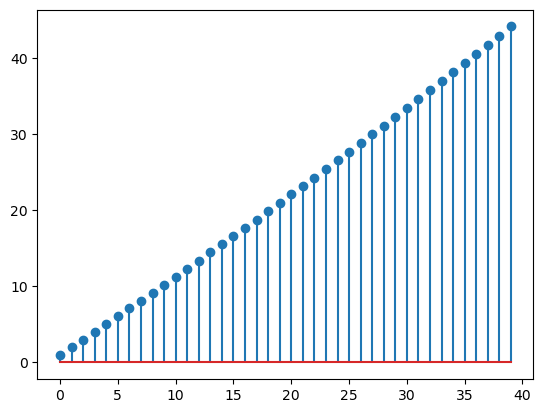

In [ ]:
N = 40
x = np.zeros(N)
y = np.ones(N)
for n in range(1,N):
    x[n] = 1
    y[n] = 1.005*y[n-1] + x[n]
plt.stem(y)

---

## Propriedades dos sistemas discretos

Os sistemas de tempo discretos podem ter ou não ter as seguintes propriedades.

### Causalidade

Um sistema é **causal** se a sua saída $y[n]$ depende apenas dos valores da entrada e saída até o instante $n$. 

---

#### Exemplo 2



$y[n] = 0.2y[n-1] + x[n]$

é um sistema causal.

---

Se a saída $y[n]$ de um sistema depende de valores da entrada e saída em instantes maiores do que $n$ o sistema é **não-causal**. 

---

#### Exemplo 3

$y[n] = \frac{x[n+1]+x[n]+x[n-1]}{3}$

é um sistema não causal.

---


### Memória

Um sistema tem memória se a saída desse sistema no instante $n$ depende de valores do sinal de entrada em valores diferentes de $n$ (passado ou futuro).

---

#### Exemplo 4

Considere o sistema com a seguinte equação de diferenças:

$$y[n] = 0.4y[n-1] + x[n-2] $$

é um sistema com memória. 

---

Chamamos os sistemas com memória de **sistemas dinâmicos**.

---

#### Exemplo 5

O seguinte sistema:

$$y[n] =0.3x[n] $$


é um sistema sem memória. 

---

Chamamos os sistemas sem memória de **sistemas estáticos**.

### Linearidade


Um **sistema linear** é um sistema que segue o princípio da sobreposição. 

<img src=./Imagens/lineardisc.png width="800">

---

#### Exemplo 6

Por exemplo, o sistema:

$$y[n] = 0.5y[n-1] - 0.3y[n-2] + x[n]$$

Podemos usar como entrada, por exemplo, $x_1[n] = u[n]$ e uma outra entrada $x_2[n] = \cos\left(\frac{\pi n}{15}\right)$. As saídas deste sistema em cada um dos casos são mostradas abaixo:

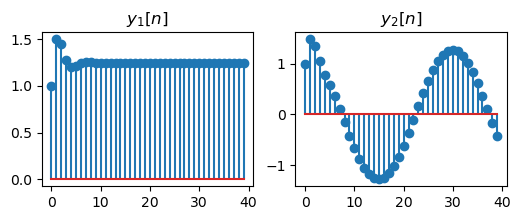

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x1 = np.ones(N)
y1 = np.zeros(N)
for n in range(N):
    y1[n] = 0.5*y1[n-1] - 0.3*y1[n-2] + x1[n]
plt.stem(y1)
plt.title('$y_1[n]$')
plt.subplot(1,2,2)
x2 = np.cos(np.pi*np.arange(N)/15)
y2 = np.zeros(N)
for n in range(N):
    y2[n] = 0.5*y2[n-1] - 0.3*y2[n-2] + x2[n]
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos agora construir um outro sinal de entrada, $x_3[n] = x_1[n] + x_2[n]$. Se esse sistema for linear, a saída do sistema para essa entrada deverá ser $y_1[n]+y_2[n]$. Abaixo estão os gráficos da saída do sistema para $x_3[n]$ e $y_1[n]+y_2[n]$.

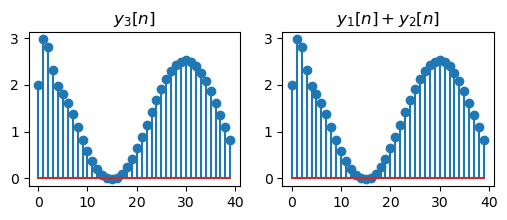

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x3 = np.ones(N) + np.cos(np.pi*np.arange(N)/15)
y3 = np.zeros(N)
for n in range(N):
    y3[n] = 0.5*y3[n-1] - 0.3*y3[n-2] + x3[n]
plt.stem(y3)
plt.title('$y_3[n]$')
plt.subplot(1,2,2)
plt.stem(y1+y2)
plt.title('$y_1[n]+y_2[n]$');

As saídas são iguais, então concluímos que o sistema é linear.

---

Caso o sistema não siga o princípio da sobreposição, o dizemos que é um **sistema não linear**. 

---

#### Exemplo 7

Por exemplo, o sistema:

$$y[n] = 0.1y[n-1]^2 + x[n]^2$$

Se usarmos as entradas $x_1[n]=\delta[n]$ e $x_2[n]= \cos\left(\frac{\pi n}{15}\right)$, obtemos as seguintes saídas.



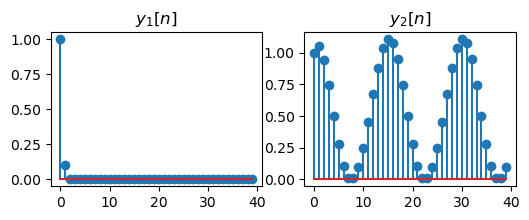

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x1 = np.zeros(N)
x1[0] = 1
y1 = np.zeros(N)
for n in range(N):
    y1[n] = 0.1*y1[n-1]**2  + x1[n]**2
plt.stem(y1)
plt.title('$y_1[n]$')
plt.subplot(1,2,2)
x2 = np.cos(np.pi*np.arange(N)/15)
y2 = np.zeros(N)
for n in range(N):
    y2[n] = 0.1*y2[n-1]**2 + x2[n]**2
plt.stem(y2)
plt.title('$y_2[n]$');

Agora, usando a entrada $x_3[n] = x_1[n]+x_2[n]$, se o sistema for linear, a saída do sistema deve ser $y_1[n]+y_2[n]$. Abaixo são mostradas a saída $y_3[n]$ e $y_1[n]+y_2[n]$.

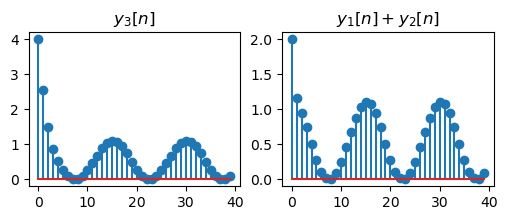

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x3 = np.zeros(N)
x3[0] = 1
x3 = x3 + np.cos(np.pi*np.arange(N)/15)
y3 = np.zeros(N)
for n in range(N):
    y3[n] = 0.1*y3[n-1]**2 + x3[n]**2
plt.stem(y3)
plt.title('$y_3[n]$')
plt.subplot(1,2,2)
plt.stem(y1+y2)
plt.title('$y_1[n]+ y_2[n]$');

Como é possível observar pelos gráficos $y_3[n]\neq y_1[n]+y_2[n]$ e portanto o sistema é não linear.

---

### Invariância no tempo

Um sistema é dito ser **invariante no tempo** se colocarmos a mesma entrada em momentos diferentes, as saídas obtidas serão as mesmas, exceto pela diferença no tempo.

<img src=Imagens/ITsisdisc.png width="800">

Um sistema que não segue essa propriedade é dito ser **variante no tempo**.

---

#### Exemplo 8

Vamos considerar o sistema que calcula a média móvel de 4 passos de tempo da entrada $x[n]$:

$$y[n] = \frac{x[n]+x[n-1]+x[n-2]+x[n-3]}{4}$$

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:


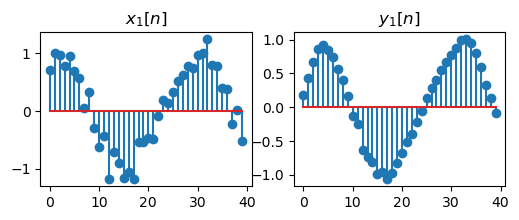

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
rng = np.random.default_rng()
x1 = np.cos(np.pi*np.arange(N)/15) + 0.2*rng.normal(size=N)
y1 = np.zeros(N)
for n in range(0,N):
    if n == 0:
        y1[n] = x1[n]/4
    elif n == 1:
        y1[n] = (x1[n]+x1[n-1])/4
    elif n == 2:
        y1[n] = (x1[n]+x1[n-1]+x1[n-2])/4
    else:
        y1[n] = (x1[n]+x1[n-1]+x1[n-2]+x1[n-3])/4
plt.stem(x1)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(y1)
plt.title('$y_1[n]$');

Agora vamos colocar a mesma entra entrada, porém atrasada de 10 passos de tempo ($x_2[n] = x_1[n-10]$).

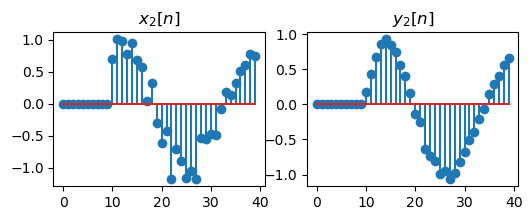

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x2 = np.zeros(N)
x2[10:] = x1[0:30]
y2 = np.zeros(N)
for n in range(3,N):
    if n == 0:
        y2[n] = x2[n]/4
    elif n == 1:
        y2[n] = (x2[n]+x2[n-1])/4
    elif n == 2:
        y2[n] = (x2[n]+x2[n-1]+x2[n-2])/4
    else:
        y2[n] = (x2[n]+x2[n-1]+x2[n-2]+x2[n-3])/4
plt.stem(x2)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos observar que a saída $y_2[n]$ é igual a $y_1[n]$, porém atrasado de 10 passos. Isso acontece que porque esse sistema invariante no tempo.

---

---

#### Exemplo 9

Vamos pegar outro exemplo de sistema:

$$y[n] = n\frac{x[n]+x[n-1]+x[n-2]+x[n-3]}{4}$$

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:

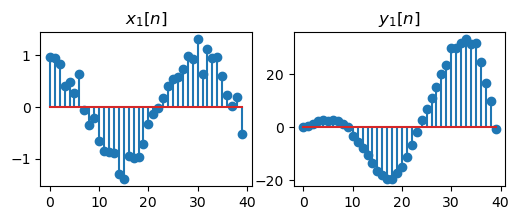

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
rng = np.random.default_rng()
x1 = np.cos(np.pi*np.arange(N)/15) + 0.2*rng.normal(size=N)
y1 = np.zeros(N)
for n in range(0,N):
    if n == 0:
        y1[n] = n*x1[n]/4
    elif n == 1:
        y1[n] = n*(x1[n]+x1[n-1])/4
    elif n == 2:
        y1[n] = n*(x1[n]+x1[n-1]+x1[n-2])/4
    else:
        y1[n] = n*(x1[n]+x1[n-1]+x1[n-2]+x1[n-3])/4
plt.stem(x1)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(y1)
plt.title('$y_1[n]$');

Agora vamos colocar a mesma entra entrada, porém atrasada de 10 passos de tempo ($x_2[n] = x_1[n-10]$).

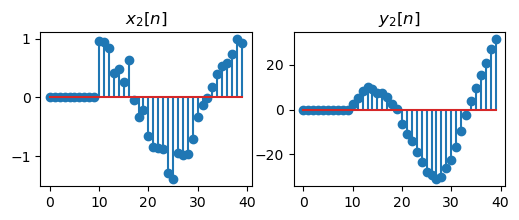

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x2 = np.zeros(N)
x2[10:] = x1[0:30]
y2 = np.zeros(N)
for n in range(3,N):
    if n == 0:
        y2[n] = nx2[n]/4
    elif n == 1:
        y2[n] = n*(x2[n]+x2[n-1])/4
    elif n == 2:
        y2[n] = n*(x2[n]+x2[n-1]+x2[n-2])/4
    else:
        y2[n] = n*(x2[n]+x2[n-1]+x2[n-2]+x2[n-3])/4
plt.stem(x2)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos observar que a saída $y_2[n]$ não é igual a $y_1[n]$ atrasado de 10 passos. Ela tem uma outra forma. Isso acontece que porque esse sistema é variante no tempo.

---

### Estabilidade

O conceito de estabilidade é bem importante e será explorado bastante ao longo do curso, bem como em outros cursos (particularmente em disciplinas que envolvam Controle). Intuitivamente, o conceito um sistema instável é um sistema cuja saída se descontrola (aumenta ou diminui de forma indefinida) mesmo com uma entrada pequena, ou que não cresça para sempre. 

---

#### Exemplo 10

Por exemplo, um sistema acumulador (que soma todos os valores que recebe como entrada), mesmo se recebe como entrada um sinal que não vai para o infinito (como um degrau), a saída aumenta indefinidamente:

$$y[n] = y[n-1] + x[n] $$

Se usarmos o sinal degrau $u[n]$ como entrada, a sua saída tem o seguinte gráfico:

<StemContainer object of 3 artists>

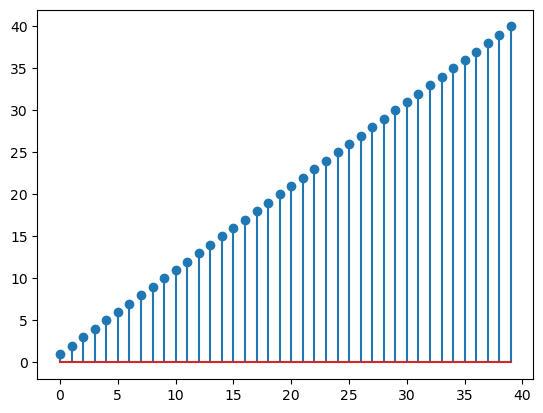

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 40
x = np.zeros(N)
y = np.ones(N)
for n in range(1,N):
    x[n] = 1
    y[n] = 1.0*y[n-1] + x[n]
plt.stem(y)


Pode-se observar que ela cresce indefinidamente. Isso caracteriza o sistema como instável (geralmente o sistema ser instável é uma característica ruim, que os sistemas de Controle tentam resolver).

---

Formalmente, podemos definir um **sistema estável** como sendo um sistema que se receber uma entrada finita:

$$|x[n]| < B \text{ ,para qualquer } n $$

em que $B$ é um número real finito, então:

$$|y[n]| < L \text{ .para qualquer } n$$

em que $L$ é um outro número real finito.

Um sistema que não respeita o critério acima é chamado de **sistema instável**.


---

#### Exemplo 11

Um exemplo de sistema estável é o que tem a seguinte equação de diferenças:

$$y[n] = 0.3y[n-1] + x[n] $$

Se usarmos o sinal degrau como entrada deste sistema, a saída terá o seguinte gráfico:

<StemContainer object of 3 artists>

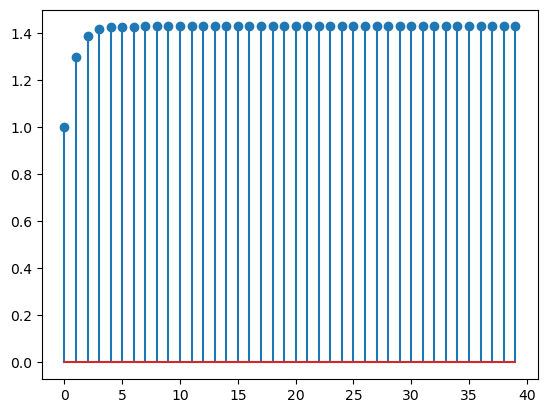

In [ ]:
N = 40
x = np.zeros(N)
y = np.ones(N)
for n in range(1,N):
    x[n] = 1
    y[n] = 0.3*y[n-1] + x[n]
plt.stem(y)

---


Como uma última nota a respeito de estabilidade, o critério mostrado acima é apenas uma maneira de definir estabilidade, conhecido como **BIBO** (*Bounded Input Bounded Output*, Entrada Limitada, Saída Limitada). Existem outros critérios, como a definição de Lyapunov ou estabilidade assintótica,  normalmente vistos em disciplinas de Controle. Neste curso, sempre que for mencionado estabilidade, será de acordo com o critério BIBO.

### Invertibilidade

Um sistema é dito ser um **sistema invertível** se para entradas diferentes o sistema gera saídas diferentes. Caso o sistema seja invertível é possível encontrar o seu **sistema inverso**. Se usarmo⁰pĝs como entrada de um sistema inverso do sistema S1 a saída do sistema S1 $y_1[n]$ devemos obter a entrada $x_1[n]$.

<img src=Imagens/inversesisdisc.png width="800">

---

#### Exemplo 12

Por exemplo, o sistema acumulador:

$$y[n] = y[n-1] + x[n]$$

Temos como sistema inverso:

$$y[n] = x[n] - x[n-1] $$

Para obter esse sistema, basta isolar o sinal $x[n]$ e trocar os os nomes de $x$ e $y$ (apenas para manter o padrão de usar $x$ como entrada e $y$ como saída).

---

---

#### Exemplo 13

Um outro exemplo é o sistema abaixo:

$y[n] = x[n]^2$

Esse é um **sistema não invertível**. Podemos deduzir isso observando que a entrada $x_1[n]=u[n]$ e a entrada $x_2[n]=-u[n]$ geram a mesma saída.

---

## Sistemas que serão estudados no restante do curso

O restante do curso se restringirá à classe de sistemas **lineares** e **invariantes no tempo** (às vezes se usa a sigla **SLIT**). Essa restrição acontece por dois principais motivos:

- a maioria dos sistemas encontrados em Engenharia tem essa característica (ou podem ser simplificados para podermos considerar que eles têm essa característica).

- existem muitos métodos para tratar esses sistemas. São esses métodos que veremos ao longo do curso.

Alem disso, a maioria dos sistemas que veremos serão **causais** (já que a maioria dos sistemas encontrados na prática são causais), embora a maioria dos métodos vistos também funcionem para sistemas não causais.

É muito importante saber definir o sistema com o qual se está trabalhando. Se não for um sistema linear e invariante no tempo, os métodos que aprenderemos no curso não funcionarão. Neste caso, você deve procurar técnicas para tratar sistemas e sinais não-lineares.


Os sistemas discretos que sempre são lineares e invariantes no tempo têm a seguinte forma:

$$\displaystyle\sum_{i=0}^N a_iy[n-i] = \displaystyle\sum_{i=0}^N b_ix[n-i]$$

com os parâmetros $a_i$ e $b_i$ sendo constantes.

## Exercícios

**1)** Um sistema linear recebe o sinal $x_1[n]$ e dá como resposta $y_1[n]$.

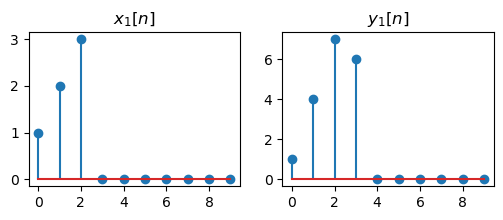

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
n = np.arange(10)
x = np.zeros_like(n)
x[0] = 1
x[1] = 2
x[2] = 3
y = np.zeros_like(n)
y[0] = 1
y[1] = 4
y[2] = 7
y[3] = 6
plt.stem(n, x)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(n, y)
plt.title('$y_1[n]$');

O mesmo sistema linear, quando recebe o sinal $x_2[n]$ dá como resposta o sinal $y_2[n]$.

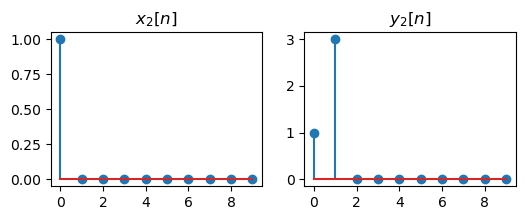

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
n = np.arange(10)
x = np.zeros_like(n)
x[0] = 1
y = np.zeros_like(n)
y[0] = 1
y[1] = 3
plt.stem(n, x)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(n, y)
plt.title('$y_2[n]$');

Esse sistema é invariante no tempo?

**2)** Entre os sistemas abaixo, quais são lineares e quais são invariantes no tempo:

a) $y[n] = nx[n]$

b) $y[n] = x[n] + 1$

c) $y[n] + 2y[n-1] = 3x[n] + nx[n-1]$

d) $y[n] + 2y[n-1] = 3x[n] + 4x[n-1]$

**3)** Um sistema $S$ é composto de dois subsistemas ($S_1$ e $S_2$), ligados em série com o subsistema $S_1$ seguido do subsistema $S_2$ (a saída do sistema $S_1$ é a entrada do sistema $S_2$).

O subsistema $S_1$ tem a seguinte equação de diferenças:

$y_1[n] = 2x_1[n] + 4x_1[n-1]$

O subsistema $S_2$ tem a seguinte equação de diferenças:

$y_2[n] = x_2[n-2]+0.5x_2[n-3]$

Determine a relação entrada-saída do sistema $S$. Se a ordem dos subsistemas  se inverter ($S_2$ antes do $S_1$), a  relação entrada-saída do sistema resultante muda? Porquê?

**4)** Um sistema é descrito por:

$$y[n] = \frac{1}{2}\displaystyle\sum_{k=-\infty}^\infty x[k](\delta[n-k] + \delta[n+k]) $$

a) O que o sistema faz?

b) O sistema é estável (BIBO)? O sistema é linear? O sistema tem memória? O sistema é causal? O sistema é invariante no tempo?

**5)** Determine se os sistemas abaixo têm as seguintes propriedades: memória, invariante no tempo, linear, causal, estável:

a) $y[n] = x[-n]$

b) $y[n] = x[n-2] - 2x[n-8]$

c) $y[n] = nx[n]$

d) $y[n] = \text{Par}\{ x[n-1]\}$

e) $y[n] = \left\{ \begin{array}{cc}x[n]& ,n\geq 1 \\ 0& ,n=0 \\ x[n+1]&,n\leq -1\end{array}\right.$

f) $y[n] = x[4n+1]$

**6)** Determine se os seguintes sistemas são invertíveis. Se forem, encontre o sistema inverso. Se não forem, encontre dois sinais de entrada que tenham a mesma saída:

a) $y[n] = nx[n]$

b) $ y[n] = \left\{ \begin{array}{cc}x[n-1]& ,n\geq 1 \\ 0& ,n=0 \\ x[n]&,n\leq -1\end{array}\right.$

c) $y[n] = x[n]x[n-1]$

d) $y[n] = x[1-n]$

e) $y[n] = \displaystyle\sum_{k=-\infty}^n\left(\frac{1}{2}\right)^{n-k}x[k]$

f) $y[n] = \left\{ \begin{array}{cc}x[n+1]& ,n\geq 0 \\ x[n]& ,n<0 \end{array}\right.$

g) $y[n] = x[2n]$

h)  $y[n] = \left\{ \begin{array}{cc}x[n/2]& ,n \text{ par} \\ 0& ,n \text{ ímpar}\end{array}\right.$

**7)** Considere um sistema com a seguinte equação de diferenças:

$$y[n] = x[n]x[n-2]$$

Esse sistema tem um sistema inverso? O sistema tem memória? Qual a saída do sistema quando $x[n]=A\delta[n]$, com $A$ sendo um número complexo qualquer?

**8)** A saída $y[n]$ de um caixa de supermercado é o custo total de $n$ itens registrados pelo caixa. A entrada $x[n]$ é o custo do n-ésimo item. Escreva a equação de diferenças que relacione $y[n]$ com $x[n]$.



**9)** Um sistema linear e invariante no tempo tem a saída $y_1$ quando tem como entrada o sinal $x_1[n]$. Faça o gráfico da resposta do sistema quando ele tem a entrada $x_2[n]$.

Text(0.5, 1.0, '$x_2[n]$')

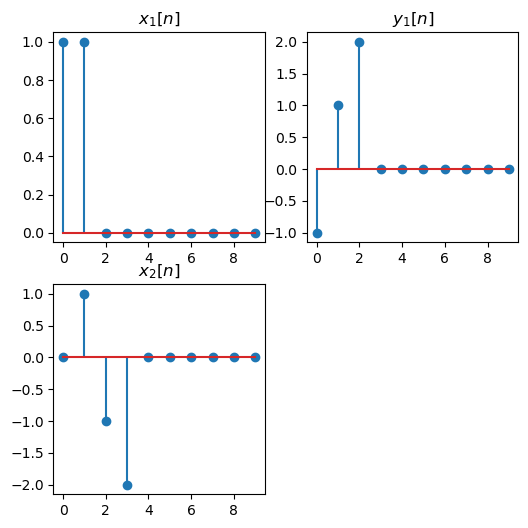

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
n = np.arange(10)
x = np.zeros_like(n)
x[0] = 1
x[1] = 1
y = np.zeros_like(n)
y[0] = -1
y[1] = 1
y[2] = 2
plt.stem(n, x)
plt.title('$x_1[n]$')
plt.subplot(2,2,2)
plt.stem(n, y)
plt.title('$y_1[n]$');
plt.subplot(2,2,3)
n = np.arange(10)
x = np.zeros_like(n)
x[1] = 1
x[2] = -1
x[3] = -2
plt.stem(n, x)
plt.title('$x_2[n]$')




**10)** Um sistema discreto é descrito por:

$$y[n] = \frac{x[n-1]}{x[n]} $$

a) O sistema é estável (BIBO)? Porquê?

b) O sistema tem memória? Porquê?

c) O sistema é causal? Porquê?

**11)** Encontre os três primeiros valores de $y[n]$, de forma recursiva:

a) $y[n] = 0.5y[n-1]$, com $y[-1] = 10$

b) $y[n+1] = -2y[n]+ x[n+1]$, com $x[n]= e^{-n}u[n]$ e $y[-1] = 0$

c) $y[n] - 0.6y[n-1]-0.16y[n-2]=0$, com $y[-1]= -25, y[-2]=0$

d) $y[n+2] + 2y[n+1]+0.5y[n] = x[n+2]+x[n+1]+2x[n-3]$, com $x[n] = 2^nu[n], y[-1]=3, y[-2]=2$

e) $y[n] = -2y[n-1]-y[n-2] + 2x[n] - x[n-1] $, com $x[n] = 3^{-n}u[n], y[-1] = 2, y[-2]=3$

## Referências

- Oppenheim, M. e Willsky, S.,  Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, A.V. e Schafer, R.W., Processamento em tempo discreto de sinais, 2013 

## Solução dos exercícios

**Exercício 2** Resolvido por Gabriel Sanches Oliveira

a) $y[n] = nx[n]$

Este sistema é linear porque satisfaz a propriedade de superposição. Se você aplicar uma combinação linear de sinais de entrada, a saída será a mesma combinação linear das saídas individuais correspondentes. No entanto, ele não é invariante no tempo porque a multiplicação pela variável n não mantém o mesmo atraso/tempo.

b) $y[n] = x[n] + 1$

Este sistema é linear por causa da propriedade de superposição.É invariante no tempo

c) $y[n] + 2y[n-1] = 3x[n] + nx[n-1]$

Este sistema é linear porque a soma ponderada das entradas resulta em uma saída que é a mesma soma ponderada das saídas correspondentes. Quanto à invariância no tempo, ele não é invariante. Isso ocorre porque porque a multiplicação pela variável n não mantém o mesmo atraso/tempo.

d) y[n] + 2y[n-1] = 3x[n] + 4x[n-1]
Este sistema é linear, pois a soma ponderada das entradas resulta em uma saída que é a mesma soma ponderada das saídas correspondentes. Ele é invariante.

**Exercício 8** Resolvido por Gabriel Sanches Oliveira

A equação de diferenças que relaciona a saída y[n] com a entrada x[n] pode ser definida da seguinte forma:

$y[n]=y[n−1]+x[n]$

Nessa equação, y[n] é a saída no instante n, y[n−1] é a saída no instante n-1, e x[n] é a entrada no instante n, ou seja, o custo do n-ésimo item registrado pelo caixa.

Essa equação descreve que o custo total y[n] no instante
n é igual ao custo total no instante anterior y[n−1] somado ao custo do n-ésimo item x[n] registrado no caixa. Isso reflete a ideia de que o custo total é acumulativo, incorporando os custos individuais dos itens registrados ao longo do tempo.

**Exercício 10** Resolvido por Gabriel Sanches Oliveira

O sistema descrito pela equação

$y[n]= \frac{x[n-1]}{x[n]}$


a)
Um sistema é considerado estável BIBO se a saída permanecer limitada, mesmo quando a entrada for limitada. No caso deste sistema, a estabilidade BIBO dependerá das propriedades do sinal de entrada x[n].
Se considerarmos que a entrada x[n] é limitada, ou seja, não cresce infinitamente, então a estabilidade do sistema dependerá principalmente do comportamento de x[n] no ponto em que x[n]=0 (pois o denominador da equação se tornaria zero).Se x[n] se aproximar de zero (ou se tornar zero) em algum ponto, a saída y[n] se tornará indefinida (divisão por zero), o que pode resultar em instabilidade. Portanto, podemos dizer que o sistema não é estável BIBO, uma vez que uma entrada limitada pode levar a uma saída não limitada.

b) O sistema tem memória?

Um sistema tem memória se a saída em qualquer instante de tempo depende das entradas anteriores. Nesse caso, o sistema apresenta memória, pois a saída
y[n] depende da entrada x[n−1], ou seja, de uma amostra anterior.

c) O sistema é causal?

Um sistema é causal se a saída em qualquer instante de tempo depende apenas das entradas presentes e passadas, mas não de entradas futuras. Neste sistema, a saída y[n]depende da entrada apenas da x[n−1], o que significa que ele é causal, já que a saída depende de uma entrada passada

**Exercício 11** Resolvido por Gabriel Sanches Oliveira
a)

1. Para \(n = 0\):
   $y[0] = 0.5y[-1] = 0,5 \cdot 10 = 5$

2. Para \(n = 1\):
   $y[1] = 0.5y[0] = 0,5 \cdot 5 = 2.5$

3. Para \(n = 2\):
   $y[2] = 0.5y[1] = 0.5 \cdot 2,5 = 1.25$

Portanto, os valores calculados são:
- $y[0] = 5$
- $y[1] = 2,5$
- $y[2] = 1,25$

b)

1. Para \(n = 0\):

   $y[0] = -2y[-1] + x[0] = -2 \cdot 0 + 1 = 1$

2. Para \(n = 1\):
   $y[1] = -2y[0] + x[1] = -2 \cdot 1 + e^{-1} = -2 + \frac{1}{e} $

3. Para \(n = 2\):
   $y[2] = -2y[1] + x[2] = -2 \left( -2 + \frac{1}{e} \right) + e^{-2} = 4 - \frac{2}{e} + e^{-2}$

Portanto, os valores calculados são:
- $y[0] = 1$
- $y[1] = -2 + \frac{1}{e}$
- $y[2] = y[2] = 4 - \frac{2}{e} + e^{-2}$

c)

1. Para \(n = 0\):

   $y[0] = 0,6y[-1] + 0,16y[n-2] = -15 $

2. Para \(n = 1\):

   $y[1] = 0,6y[0] + 0,16y[n-1] = -13 $

3. Para \(n = 2\):

   $y[2] = 0,6y[1] + y[0] = -10,2$

Portanto, os valores calculados são:
- $y[0] = -15$
- $y[1] = -13$
- $y[2] = -10,2$

d)

1. Para \(n = 0\):

   $y[0] = -2y[-1] -0,5y[-2]+x[0]+x[-1]+x[-5] = -6 $

2. Para \(n = 1\):

   $y[1] = -2y[0] - 0,5y[-1]+x[1]+x[0]+x[-4] = 13,5 $

3. Para \(n = 2\):
   $y[2] = -2y[1] - 0,5y[0]+x[2]+x[1]+x[-3] = -18$

Portanto, os valores calculados são:
- $y[0] = -6$
- $y[1] = 13,5$
- $y[2] = -18$

e)

1. Para \(n = 0\):

$y[0] = -2y[-1] - y[-2] + 2x[0] - x[-1] = -4 - 3 + 2 - 0 = -5$


2. Para \(n = 1\):

$y[1] = -2y[0] - y[-1] + 2x[1] - x[0] = 10 - 2 + \frac{2}{3} - 1 = 8 + \frac{2}{3}$


3. Para \(n = 2\):

$y[2] = -2y[1] - y[0] + 2x[2] - x[1] = -16 - \frac{4}{3} + \frac{2}{9} + \frac{1}{3} = -16 - \frac{1}{3} + \frac{1}{3} = -16$


Portanto, os valores calculados são:
- $y[0] = -5$
- $y[1] = 8 +\frac{2}{3}$
- $y[2] = -16$